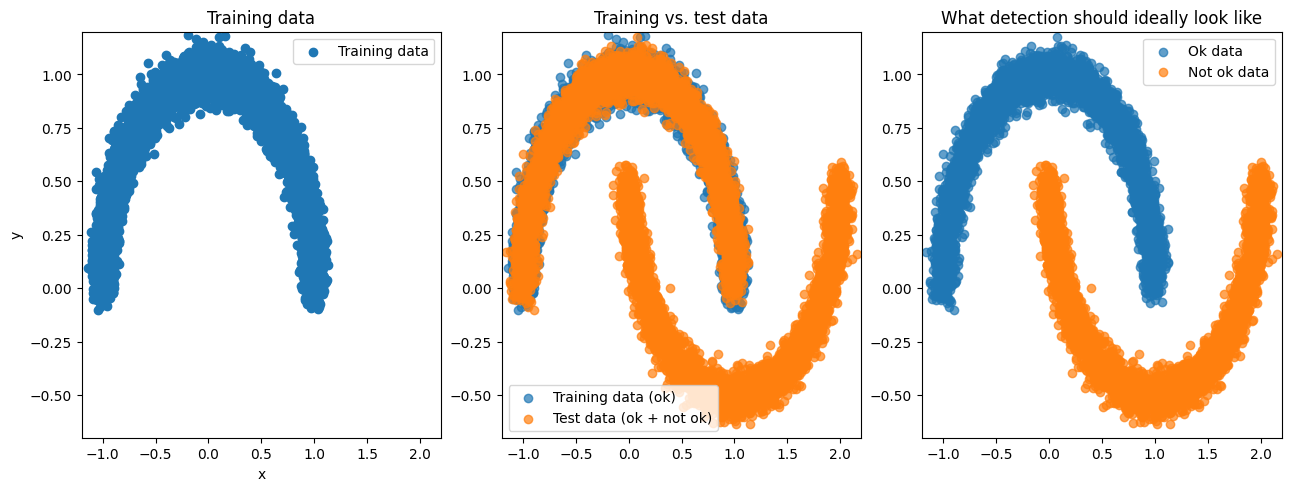

In [1]:
# Let's set up imports we need
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data
from iav_flap_anomaly_detection import make_data, plot_data
X_train, X_test, test_ground_truth = make_data()

# Visualize the data
plot_data(X_train, X_test, test_ground_truth)

In [2]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    # Convert predictions to binary labels compatible with ground truth
    # Most models use: 1 for inliers, -1 for outliers
    # Convert to match test_ground_truth: 1 for normal, -1 for anomaly
    
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    # Print classification report
    print(f"{model_name} Classification Report:")
    print(classification_report(y_true, y_pred))
    
    # Print confusion matrix
    print(f"{model_name} Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\n")
    
    return accuracy

# Let's try multiple models

# 1. Isolation Forest
print("Training Isolation Forest...")
iso_forest = IsolationForest(random_state=42, contamination='auto')
iso_forest.fit(X_train)  # Training on normal data only
iso_forest_preds = iso_forest.predict(X_test)
iso_forest_accuracy = evaluate_model(test_ground_truth, iso_forest_preds, "Isolation Forest")

# 2. One-Class SVM
print("Training One-Class SVM...")
ocsvm = OneClassSVM(gamma='auto', nu=0.1)
ocsvm.fit(X_train)  # Training on normal data only
ocsvm_preds = ocsvm.predict(X_test)
ocsvm_accuracy = evaluate_model(test_ground_truth, ocsvm_preds, "One-Class SVM")

# 3. Local Outlier Factor
print("Training Local Outlier Factor...")
lof = LocalOutlierFactor(novelty=True, contamination=0.1)
lof.fit(X_train)  # Training on normal data only
lof_preds = lof.predict(X_test)
lof_accuracy = evaluate_model(test_ground_truth, lof_preds, "Local Outlier Factor")

# 4. Elliptic Envelope
print("Training Elliptic Envelope...")
ee = EllipticEnvelope(contamination=0.1, random_state=42)
ee.fit(X_train)  # Training on normal data only
ee_preds = ee.predict(X_test)
ee_accuracy = evaluate_model(test_ground_truth, ee_preds, "Elliptic Envelope")

Training Isolation Forest...
Isolation Forest Accuracy: 0.7672
Isolation Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.68      1.00      0.81      5000
           1       1.00      0.53      0.70      5000

    accuracy                           0.77     10000
   macro avg       0.84      0.77      0.75     10000
weighted avg       0.84      0.77      0.75     10000

Isolation Forest Confusion Matrix:
[[5000    0]
 [2328 2672]]


Training One-Class SVM...
One-Class SVM Accuracy: 0.8139
One-Class SVM Classification Report:
              precision    recall  f1-score   support

          -1       0.87      0.73      0.80      5000
           1       0.77      0.89      0.83      5000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000

One-Class SVM Confusion Matrix:
[[3670 1330]
 [ 531 4469]]


Training Local Outlier F

In [3]:
# Store results in a dictionary for comparison
results = {
    "Isolation Forest": {"accuracy": iso_forest_accuracy, "predictions": iso_forest_preds},
    "One-Class SVM": {"accuracy": ocsvm_accuracy, "predictions": ocsvm_preds},
    "Local Outlier Factor": {"accuracy": lof_accuracy, "predictions": lof_preds},
    "Elliptic Envelope": {"accuracy": ee_accuracy, "predictions": ee_preds}
}

# Find best performing model
best_model_name = max(results, key=lambda x: results[x]["accuracy"])
best_accuracy = results[best_model_name]["accuracy"]
best_predictions = results[best_model_name]["predictions"]

print(f"\nPerformance Summary:")
for model, data in results.items():
    print(f"{model}: {data['accuracy']:.4f}")

print(f"\nBest performing model: {best_model_name} with accuracy: {best_accuracy:.4f}")


Performance Summary:
Isolation Forest: 0.7672
One-Class SVM: 0.8139
Local Outlier Factor: 0.9462
Elliptic Envelope: 0.8533

Best performing model: Local Outlier Factor with accuracy: 0.9462


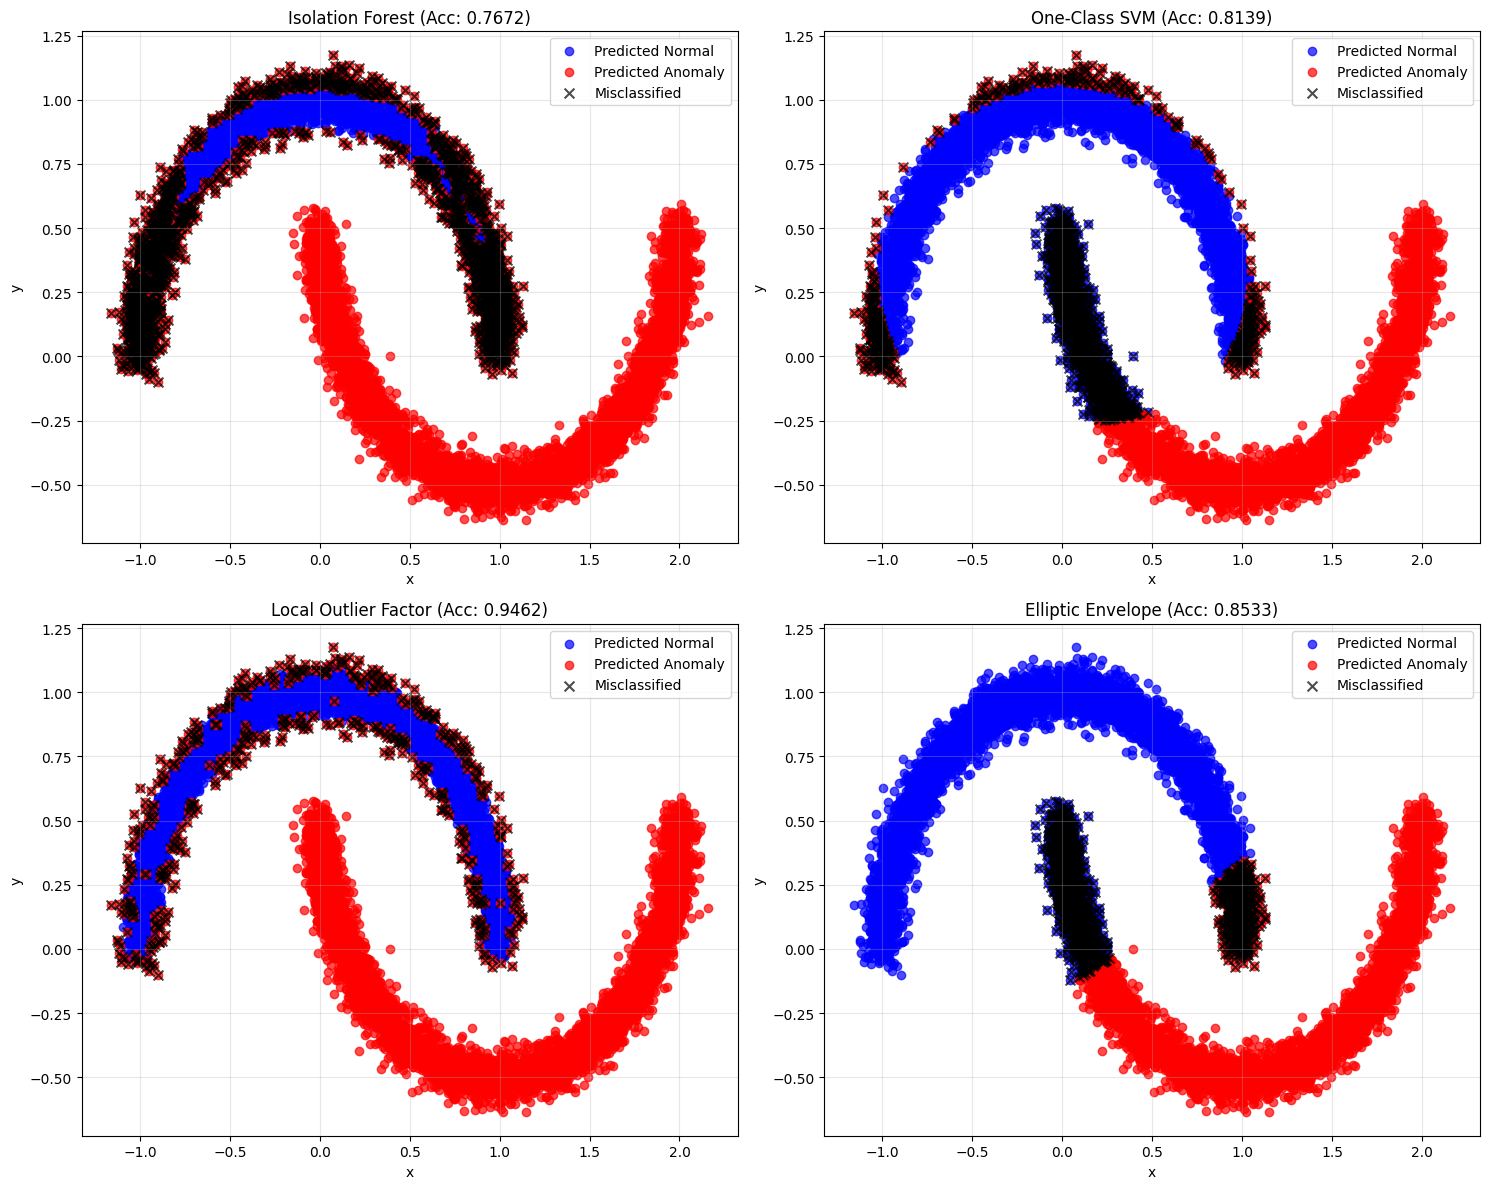

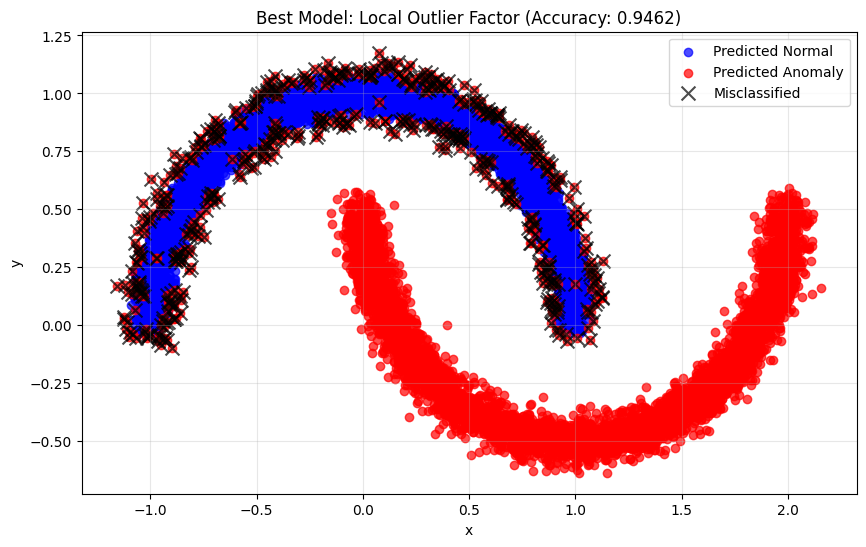

In [4]:
# Visualize results from all models
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (model_name, data) in enumerate(results.items()):
    y_pred = data["predictions"]
    
    # Plot points classified as normal (inliers)
    normal_points = X_test[y_pred == 1]
    axes[i].scatter(normal_points[:, 0], normal_points[:, 1], c='blue', alpha=0.7, label='Predicted Normal')
    
    # Plot points classified as anomalies (outliers)
    anomaly_points = X_test[y_pred == -1]
    axes[i].scatter(anomaly_points[:, 0], anomaly_points[:, 1], c='red', alpha=0.7, label='Predicted Anomaly')
    
    # Highlight misclassifications
    misclassified = X_test[test_ground_truth != y_pred]
    axes[i].scatter(misclassified[:, 0], misclassified[:, 1], c='black', marker='x', s=50, 
                alpha=0.7, label='Misclassified')
    
    axes[i].set_title(f"{model_name} (Acc: {results[model_name]['accuracy']:.4f})")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].legend(loc='upper right')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Now visualize the best model in more detail
plt.figure(figsize=(10, 6))
    
# Plot points classified as normal (inliers)
normal_points = X_test[best_predictions == 1]
plt.scatter(normal_points[:, 0], normal_points[:, 1], c='blue', alpha=0.7, label='Predicted Normal')

# Plot points classified as anomalies (outliers)
anomaly_points = X_test[best_predictions == -1]
plt.scatter(anomaly_points[:, 0], anomaly_points[:, 1], c='red', alpha=0.7, label='Predicted Anomaly')

# Highlight misclassifications
misclassified = X_test[test_ground_truth != best_predictions]
plt.scatter(misclassified[:, 0], misclassified[:, 1], c='black', marker='x', s=100, 
            alpha=0.7, label='Misclassified')

plt.title(f"Best Model: {best_model_name} (Accuracy: {best_accuracy:.4f})")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Fine-tuning Local Outlier Factor...
Best Local Outlier Factor parameters: {'n_neighbors': 10, 'contamination': 0.05}
Best accuracy: 0.9738
Optimized Local Outlier Factor Accuracy: 0.9738
Optimized Local Outlier Factor Classification Report:
              precision    recall  f1-score   support

          -1       0.95      1.00      0.97      5000
           1       1.00      0.95      0.97      5000

    accuracy                           0.97     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000

Optimized Local Outlier Factor Confusion Matrix:
[[5000    0]
 [ 262 4738]]




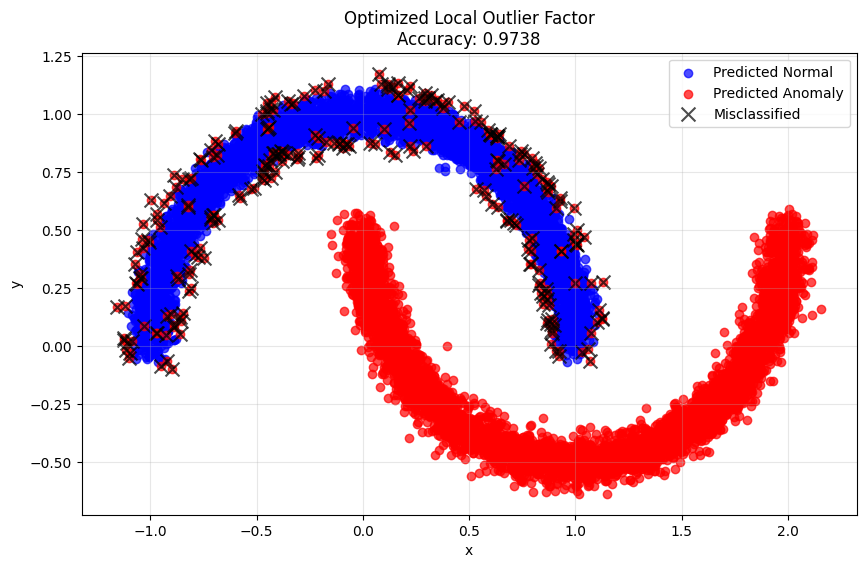

In [5]:
# Fine-tune the best-performing model dynamically
print(f"Fine-tuning {best_model_name}...")

if best_model_name == "One-Class SVM":
    best_params = {"nu": 0.1, "gamma": 'auto'}
    best_accuracy = 0

    for nu in [0.01, 0.05, 0.1, 0.15, 0.2]:
        for gamma in ['auto', 'scale', 0.01, 0.1, 1.0]:
            model = OneClassSVM(gamma=gamma, nu=nu)
            model.fit(X_train)
            preds = model.predict(X_test)
            accuracy = accuracy_score(test_ground_truth, preds)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {"nu": nu, "gamma": gamma}

    print(f"Best {best_model_name} parameters: {best_params}")
    print(f"Best accuracy: {best_accuracy:.4f}")

    # Train final model with best parameters
    final_model = OneClassSVM(**best_params)

elif best_model_name == "Isolation Forest":
    best_params = {"n_estimators": 100, "max_samples": 'auto'}
    best_accuracy = 0

    for n_estimators in [50, 100, 200]:
        for max_samples in ['auto', 0.5, 0.8]:
            model = IsolationForest(n_estimators=n_estimators, max_samples=max_samples, random_state=42)
            model.fit(X_train)
            preds = model.predict(X_test)
            accuracy = accuracy_score(test_ground_truth, preds)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {"n_estimators": n_estimators, "max_samples": max_samples}

    print(f"Best {best_model_name} parameters: {best_params}")
    print(f"Best accuracy: {best_accuracy:.4f}")

    # Train final model with best parameters
    final_model = IsolationForest(**best_params, random_state=42)

elif best_model_name == "Local Outlier Factor":
    best_params = {"n_neighbors": 20, "contamination": 0.1}
    best_accuracy = 0

    for n_neighbors in [5, 10, 20, 30]:
        for contamination in [0.05, 0.1, 0.2]:
            model = LocalOutlierFactor(novelty=True, n_neighbors=n_neighbors, contamination=contamination)
            model.fit(X_train)
            preds = model.predict(X_test)
            accuracy = accuracy_score(test_ground_truth, preds)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {"n_neighbors": n_neighbors, "contamination": contamination}

    print(f"Best {best_model_name} parameters: {best_params}")
    print(f"Best accuracy: {best_accuracy:.4f}")

    # Train final model with best parameters
    final_model = LocalOutlierFactor(**best_params, novelty=True)

elif best_model_name == "Elliptic Envelope":
    best_params = {"contamination": 0.1}
    best_accuracy = 0

    for contamination in [0.05, 0.1, 0.2]:
        model = EllipticEnvelope(contamination=contamination, random_state=42)
        model.fit(X_train)
        preds = model.predict(X_test)
        accuracy = accuracy_score(test_ground_truth, preds)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {"contamination": contamination}

    print(f"Best {best_model_name} parameters: {best_params}")
    print(f"Best accuracy: {best_accuracy:.4f}")

    # Train final model with best parameters
    final_model = EllipticEnvelope(**best_params, random_state=42)

# Train and evaluate the final model
final_model.fit(X_train)
final_preds = final_model.predict(X_test)
final_accuracy = evaluate_model(test_ground_truth, final_preds, f"Optimized {best_model_name}")

# Visualize final results and show accuracy in the graph
# Define the plot_results function
def plot_results(X_test, ground_truth, predictions, title, accuracy):
    plt.figure(figsize=(10, 6))
    
    # Plot points classified as normal (inliers)
    normal_points = X_test[predictions == 1]
    plt.scatter(normal_points[:, 0], normal_points[:, 1], c='blue', alpha=0.7, label='Predicted Normal')

    # Plot points classified as anomalies (outliers)
    anomaly_points = X_test[predictions == -1]
    plt.scatter(anomaly_points[:, 0], anomaly_points[:, 1], c='red', alpha=0.7, label='Predicted Anomaly')

    # Highlight misclassifications
    misclassified = X_test[ground_truth != predictions]
    plt.scatter(misclassified[:, 0], misclassified[:, 1], c='black', marker='x', s=100, 
                alpha=0.7, label='Misclassified')

    # Add accuracy to the title
    plt.title(f"{title}\nAccuracy: {accuracy:.4f}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Call the plot_results function
plot_results(X_test, test_ground_truth, final_preds, f"Optimized {best_model_name}", final_accuracy)